In [51]:
from glob import glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [52]:
def loadData():
    file_list = [] # Initialisiert eine leere Liste, um Dateinamen zu speichern.

    # Sucht nach allen Verzeichnissen, deren Name mit 'data' beginnt
    data_dirs = glob("data*/")

    # Iteriert durch jedes gefundene Verzeichnis und sucht darin nach Dateien mit der Endung '.npz'
    # Die gefundenen Dateien werden der `file_list` hinzugefügt.

    for directory in data_dirs:
        file_list.extend(glob(f"{directory}*.npz"))
        
    file_list = np.sort(file_list)

    print(file_list)
    
    V = list()  # Initialisiert eine Liste für Spannungsdaten
    A = list()  # Initialisiert eine Liste für Anomaliedaten
    for file in file_list:
        tmp = np.load(file, allow_pickle=True)
        V.append(tmp["v"])
        A.append(tmp["anomaly"].tolist())
    
    return V,A

    #Versuch PCA auf Spannungsdaten anwenden
    #Einfärben der Punkte in der PCA anhand des Winkels

In [53]:
V,A = loadData()

['data1\\sample_000000.npz' 'data1\\sample_000001.npz'
 'data1\\sample_000002.npz' 'data1\\sample_000003.npz'
 'data1\\sample_000004.npz' 'data1\\sample_000005.npz'
 'data1\\sample_000006.npz' 'data1\\sample_000007.npz'
 'data1\\sample_000008.npz' 'data1\\sample_000009.npz'
 'data\\sample_000000.npz' 'data\\sample_000001.npz'
 'data\\sample_000002.npz' 'data\\sample_000003.npz'
 'data\\sample_000004.npz' 'data\\sample_000005.npz'
 'data\\sample_000006.npz' 'data\\sample_000007.npz'
 'data\\sample_000008.npz' 'data\\sample_000009.npz']


In [54]:
print(A)

# Initialisiere Listen für x- und y-Koordinaten
x_values = []
y_values = []


for i, anomaly in enumerate(A): 
    center = anomaly.center  
    x_values.append(center[0])  
    y_values.append(center[1])  

center_matrix = np.column_stack((x_values, y_values))

print(center_matrix)

[PyEITAnomaly_Circle(center=array([0., 0.]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([0.04255802, 0.03571042]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([0.01929424, 0.10942308]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([-0.08333333,  0.14433757]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([-0.20882058,  0.07600448]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([-0.26102573, -0.0950056 ]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([-0.16666667, -0.28867513]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([ 0.06752985, -0.38298079]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([ 0.3404642 , -0.28568338]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([ 5.0000000e-01, -1.2246468e-16]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([0.5, 0. ]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([0.38302222, 0.3213938 ]), perm=100.0, r=0.2), PyEITAnomaly_Circle(center=array([0.08682409, 0.4

In [55]:
def coord2Angle(center_matrix):
    angle = np.arctan2(center_matrix[:, 1], center_matrix[:, 0])  
    angle_deg = np.degrees(angle)
    angle_deg = np.mod(angle_deg, 360)
    return angle_deg

[  0.  40.  80. 120. 160. 200. 240. 280. 320. 360.   0.  40.  80. 120.
 160. 200. 240. 280. 320. 360.]


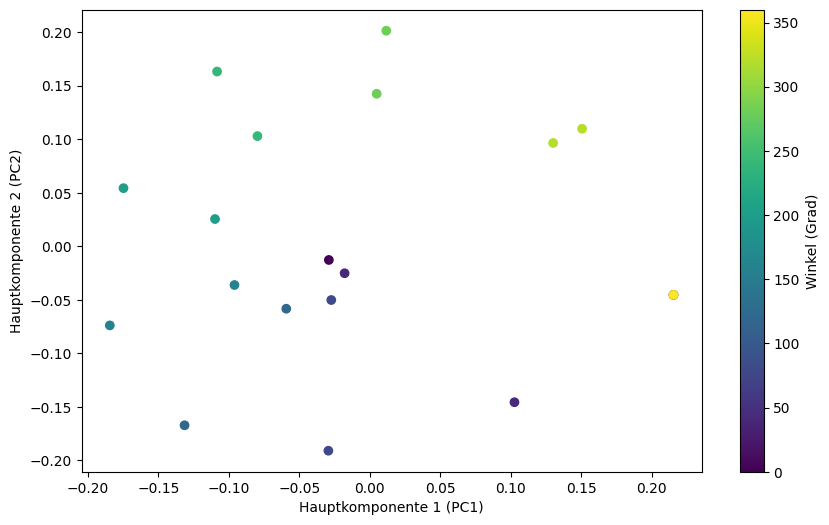

In [56]:

angle = coord2Angle(center_matrix)
print(angle)

pca = PCA(n_components=2)
V_pca = pca.fit_transform(V)

#print(V_pca)

plt.figure(figsize=(10,6))
scatter = plt.scatter(V_pca[:, 0], V_pca[:, 1], c=angle, cmap='viridis')
plt.colorbar(scatter,label='Winkel (Grad)')
plt.xlabel('Hauptkomponente 1 (PC1)')
plt.ylabel('Hauptkomponente 2 (PC2)')
#plt.title('PCA: PC1 vs. PC2')
plt.show()